<a href="https://colab.research.google.com/github/dudegrabow/var_model/blob/main/var_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DS/pibic/modelo certo.csv', encoding='utf-8')
df.head()

,obs,ANO,IND,INFLACAO,SELIC,CAMB,IND_d11,INFLACAO_d11,SELIC_d11,CAMB_d11
0,2002Q1,2002/T1,575.268892,38.153612,48.488200,468.233767,620.627201,37.638225,47.566373,464.918415
1,2002Q2,2002/T2,604.629716,39.281481,47.095984,496.854579,603.839693,39.519468,46.811582,507.988106
2,2002Q3,2002/T3,593.432672,41.960009,42.897989,615.812992,565.376990,42.260026,43.097839,617.075810
3,2002Q4,2002/T4,520.755417,47.565083,52.559563,688.762544,509.841089,47.520498,53.591319,677.406324
4,2003Q1,2003/T1,441.596880,50.544784,52.428753,629.068622,475.909432,50.074362,51.540908,625.170567


In [6]:
#checando os valores nulos
df.apply(lambda x: sum(x.isnull()), axis =0)

obs             0
ANO             0
IND             0
INFLACAO        0
SELIC           0
CAMB            0
IND_d11         0
INFLACAO_d11    0
SELIC_d11       0
CAMB_d11        0
dtype: int64

In [7]:
df.describe()

,IND,INFLACAO,SELIC,CAMB,IND_d11,INFLACAO_d11,SELIC_d11,CAMB_d11
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,410.947277,71.491621,21.560010,394.052897,411.290247,71.487383,21.544386,394.170916
std,78.045064,17.456034,12.582527,96.502723,77.350716,17.460868,12.543389,96.167738
min,266.100000,38.153612,8.024563,278.569024,260.892070,37.638225,8.059848,282.139858
25%,348.488190,58.918681,12.312205,323.962246,350.029464,58.738075,12.177104,328.397770
50%,418.616803,71.106946,16.696954,364.904024,417.916450,71.197469,16.889500,363.269504
75%,461.409676,84.683492,29.761383,443.242263,457.731922,84.719425,29.517637,445.720600
max,604.629716,104.240329,52.559563,688.762544,620.627201,104.182356,53.591319,677.406324


In [8]:
#checando os valores nulos
df.apply(lambda x: sum(x.isnull()), axis =0)

obs             0
ANO             0
IND             0
INFLACAO        0
SELIC           0
CAMB            0
IND_d11         0
INFLACAO_d11    0
SELIC_d11       0
CAMB_d11        0
dtype: int64

In [9]:
#tirando NA, se houver
df = df.dropna(axis=0)
df.describe

<bound method NDFrame.describe of        obs      ANO         IND    INFLACAO      SELIC        CAMB  \
0   2002Q1  2002/T1  575.268892   38.153612  48.488200  468.233767   
1   2002Q2  2002/T2  604.629716   39.281481  47.095984  496.854579   
2   2002Q3  2002/T3  593.432672   41.960009  42.897989  615.812992   
3   2002Q4  2002/T4  520.755417   47.565083  52.559563  688.762544   
4   2003Q1  2003/T1  441.596880   50.544784  52.428753  629.068622   
5   2003Q2  2003/T2  461.596739   50.368399  51.619668  532.550605   
6   2003Q3  2003/T3  488.044053   50.941547  39.260684  521.254057   
7   2003Q4  2003/T4  488.420997   51.699140  31.915425  523.508385   
8   2004Q1  2004/T1  447.594818   53.107363  30.598394  528.828354   
9   2004Q2  2004/T2  461.222613   55.205553  28.982592  544.262294   
10  2004Q3  2004/T3  481.192944   57.001693  28.507925  529.194413   
11  2004Q4  2004/T4  464.547852   58.120166  30.540174  506.878493   
12  2005Q1  2005/T1  415.798961   59.019312  32.616443  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


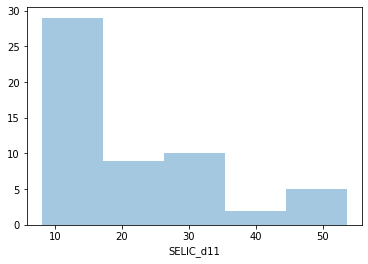

In [10]:
#como SELIC_d11 esta distribuído
sns.distplot(df.SELIC_d11,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


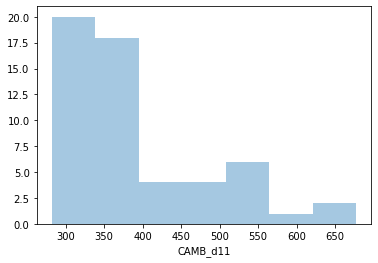

In [11]:
#como CAMB_d11 esta distribuído
sns.distplot(df.CAMB_d11,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


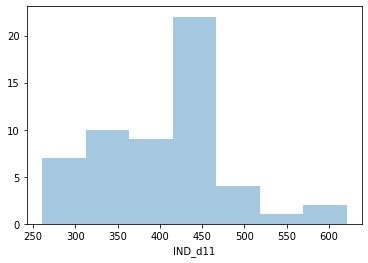

In [12]:
#como IND esta distribuído
sns.distplot(df.IND_d11,kde=False)

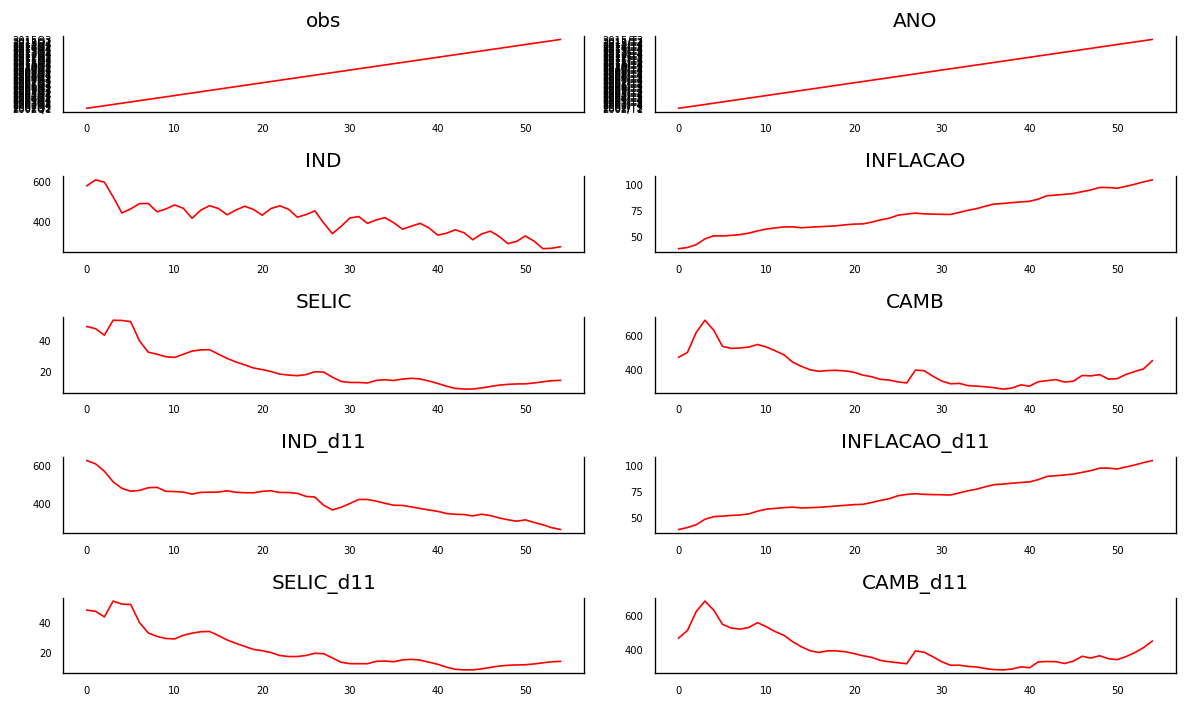

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [18]:
df1 = df[['INFLACAO_d11', 'CAMB_d11', 'IND_d11']]

In [ ]:
df1

In [ ]:
features = df[['INFLACAO_d11', 'CAMB_d11']]
features
y = df.IND_d11
print(features)

In [ ]:
y

In [ ]:
#Causalidade de Granger

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df1 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df1.columns:
        for r in df1.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df1.loc[r, c] = min_p_value
    df1.columns = [var + '_x' for var in variables]
    df1.index = [var + '_y' for var in variables]
    return df1

grangers_causation_matrix(df1, variables = df1.columns)

,INFLACAO_d11_x,CAMB_d11_x,IND_d11_x
INFLACAO_d11_y,1.0000,0.0,0.0000
CAMB_d11_y,0.0279,1.0,0.0165
IND_d11_y,0.0000,0.0,1.0000


P valor > 0,05 - **Rejeita a hipótese nula**

CAMB_d11 causa INFLACAO_d11 e CAMB_d11 causa IND_d11

In [ ]:
#Teste de cointegração

In [21]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df1, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df1,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df1.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df1)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
INFLACAO_d11 ::  36.32     > 24.2761   =>   True
CAMB_d11 ::  11.33     > 12.3212   =>   False
IND_d11 ::  0.87      > 4.1296    =>   False


In [ ]:
#Separando os dados em training e test

In [22]:
nobs = 4
df1_train, df1_test = df1[0:-nobs], df1[-nobs:]

# Check size
print(df1_train.shape)  # (119, 8)
print(df1_test.shape)  # (4, 8)

(51, 3)
(4, 3)


In [ ]:
#Chechando estacionaridade e fazendo elas estacionárias

In [23]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [32]:
# Teste ADF em cada série
for name, column in df1_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "INFLACAO_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.8631
 No. Lags Chosen       = 11
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.9985. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CAMB_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1037
 No. Lags Chosen       = 0
 Critical value 1%     = -3.568
 Critical value 5%     = -2.921
 Critical value 10%    = -2.599
 => P-Value = 0.7136. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "IND_d11" 
    -----------------------------------------------
 Null Hypothesis: Da

In [33]:
# Primeira diferença
df_differenced = df1_train.diff().dropna()

In [34]:
# Teste ADF em cada série mas agora na 1 diferença
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "INFLACAO_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0866
 No. Lags Chosen       = 10
 Critical value 1%     = -3.61
 Critical value 5%     = -2.939
 Critical value 10%    = -2.608
 => P-Value = 0.0276. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CAMB_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.546
 No. Lags Chosen       = 0
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "IND_d11" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

In [ ]:
#A série agora é estacionária 👌🏻

In [28]:
# Segunda diferença
#df_differenced = df_differenced.diff().dropna()

In [ ]:
## Teste ADF em cada série mas agora na 2 diferença
#for name, column in df_differenced.iteritems():
   # adfuller_test(column, name=column.name)
    #print('\n')

In [ ]:
#Selecionando a ordem do modelo VAR

In [35]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  10.644408380853088
BIC :  11.107711311002628
FPE :  42003.18525653488
HQIC:  10.820184866308542 

Lag Order = 2
AIC :  10.127249986199566
BIC :  10.945900428471768
FPE :  25173.15283193637
HQIC:  10.43661918412798 

Lag Order = 3
AIC :  9.918593138553128
BIC :  11.0995384162404
FPE :  20710.528216396622
HQIC:  10.362990779835657 

Lag Order = 4
AIC :  9.703459994508284
BIC :  11.253829874140344
FPE :  17169.631089711296
HQIC:  10.284237843481261 

Lag Order = 5
AIC :  9.653673554303396
BIC :  11.580780210058403
FPE :  17172.667903952814
HQIC:  10.372079566678687 

Lag Order = 6
AIC :  9.78524620075492
BIC :  12.096582771967213
FPE :  21313.880676780773
HQIC:  10.642401227233528 

Lag Order = 7
AIC :  9.786976132682069
BIC :  12.49021351956056
FPE :  24509.184095682784
HQIC:  10.783846536771144 

Lag Order = 8
AIC :  9.37633002211169
BIC :  12.47931148333199
FPE :  20319.56058464859
HQIC:  10.513695452487863 

Lag Order = 9
AIC :  7.971809069524387
BIC :  11.4825420

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [38]:
x = model.select_order(maxlags=4)
x.summary()

,AIC,BIC,FPE,HQIC
0,10.65,10.77,4.236e+04,10.70
1,10.11,10.59*,2.462e+04,10.29
2,9.826,10.66,1.865e+04,10.14*
3,9.752,10.94,1.756e+04,10.20
4,9.703*,11.25,1.717e+04*,10.28


In [39]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 29, Mar, 2022
Time:                     22:04:45
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    11.2538
Nobs:                     46.0000    HQIC:                   10.2842
Log likelihood:          -379.993    FPE:                    17169.6
AIC:                      9.70346    Det(Omega_mle):         8137.26
--------------------------------------------------------------------
Results for equation INFLACAO_d11
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.598675         0.305614            1.959           0.050
L1.INFLACAO_d11         0.552946         0.179100            3.087           0.002
L1.CAMB_d11            -0.000522         0.00

In [ ]:
#Checando a correlação dos resíduos usando DURBIN WATSON

In [47]:
def adjust(val, length= 6): return str(val).ljust(length)

In [48]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df1.columns, out):
    print(adjust(col), ':', round(val, 2))

INFLACAO_d11 : 1.83
CAMB_d11 : 2.04
IND_d11 : 1.97


In [ ]:
#Parece bom

In [ ]:
#Usando a Previsão com VAR

In [49]:
# pegue a ordem de lags
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# colocando os dados para previsão
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[ 1.72269801e+00, -1.01796445e+01, -1.23756953e+01],
       [ 2.37443377e+00,  1.31231166e+01, -9.49021039e+00],
       [-1.15437642e-02, -1.68072919e+01, -7.57886308e+00],
       [-8.03029618e-01, -5.51376637e+00,  7.04389312e+00]])

In [ ]:
#Previsão

In [86]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df1.columns + '_1d')
df_forecast

,INFLACAO_d11_1d,CAMB_d11_1d,IND_d11_1d
51,0.797278,19.083642,-0.088374
52,0.482332,-8.574678,10.155037
53,1.072844,-0.344954,-0.393975
54,1.687556,-8.316926,-3.644180


In [ ]:
#Feito, mas está na escala nos dados de treino, vamos colocá-lo de volta para a escala original, no caso aqui, precisamos realizar novamente o teste de primeira diferênça, (ficou estácionario na 1 diferença)

In [ ]:
#Inverter a transformação para ter a verdadeira previsão

In [87]:
def invert_transformation(df1_train, df_forecast, second_diff=False):
    df_fc = df_forecast.copy()
    columns = df1_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df1_train[col].iloc[-1]-df1_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df1_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [93]:
df_results = invert_transformation(df1_train, df_forecast, second_diff=False) 
df_results.loc[:, ['INFLACAO_d11_forecast', 'CAMB_d11_forecast', 'IND_d11_forecast']]       


,INFLACAO_d11_forecast,CAMB_d11_forecast,IND_d11_forecast
51,96.917071,360.032087,311.150098
52,97.399403,351.457409,321.305135
53,98.472247,351.112455,320.911160
54,100.159803,342.795529,317.266981


In [ ]:
fig, axes = plt.subplots(nrows=int(len(df1.columns)/2), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df1.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df1_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Previsão vs Atual")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
#Diagnosticando as previsões

In [118]:
df1_test

,INFLACAO_d11,CAMB_d11,IND_d11
51,98.068768,358.429990,297.548997
52,99.973028,381.215791,285.374536
53,102.296315,409.933981,270.203886
54,104.182356,447.549957,260.892070


In [120]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: INFLACAO_d11')
accuracy_prod = forecast_accuracy(df_results['INFLACAO_d11_forecast'].values, df1_test['INFLACAO_d11'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: CAMB_d11')
accuracy_prod = forecast_accuracy(df_results['CAMB_d11_forecast'].values, df1_test['CAMB_d11'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: IND_d11')
accuracy_prod = forecast_accuracy(df_results['IND_d11_forecast'].values, df1_test['IND_d11'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: INFLACAO_d11
mape   :  0.0284
me     :  -2.893
mae    :  2.893
mpe    :  -0.0284
rmse   :  3.1127
corr   :  0.9689
minmax :  0.0284

Forecast Accuracy of: CAMB_d11
mape   :  0.115
me     :  -47.9331
mae    :  48.7341
mpe    :  -0.1128
rmse   :  61.8902
corr   :  -0.9506
minmax :  0.115

Forecast Accuracy of: IND_d11
mape   :  0.1438
me     :  39.1535
mae    :  39.1535
mpe    :  0.1438
rmse   :  42.501
corr   :  -0.5199
minmax :  0.1228
mape   :  0.1438
me     :  39.1535
mae    :  39.1535
mpe    :  0.1438
rmse   :  42.501
corr   :  -0.5199
minmax :  0.1228


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
